<img align="center" src="http://sydney.edu.au/images/content/about/logo-mono.jpg">
<h1 align="center" style="margin-top:10px">Statistical Learning and Data Mining</h1>
<h2 align="center" style="margin-top:20px">Tutorial 3: Supervised Learning with scikit-learn</h2>
<br>

In this tutorial we use a simple dataset to discuss some of the basic steps of a supervised learning project: loading and processing the dataset, splitting the data into training and test sets, building a model, computing predictions, and evaluating performance.  

The [scikit-learn](https://scikit-learn.org/stable/index.html) package is the main library that we use for statistical learning in Python.  It provides a wide range of learning algorithms and tools through an [API](https://en.wikipedia.org/wiki/Application_programming_interface) that is very convenient and easy to use. For this reason, the basic pipeline that we introduce here is the same that we'll be using throughout the unit.

<p style="margin-bottom:25px">To help you place this material into a larger context, it's helpful to discuss that a data science project based on supervised machine learning generally follows some version of the following workflow. </p>

1. **Problem formulation**: formulating a business problem that can be adequately addressed by supervised learning, establishing the required resources for the project, and defining the loss function.

2. **Data collection**: acquiring and/or generating data according to the requirements of the project. 

3. **Data processing**: extracting and processing the data from its original format to a structured version that is free of errors and ready for initial analysis.

4. **Exploratory data analysis (EDA)**: using data visualisation and descriptive statistics to summarise the main characteristics of a dataset and obtain insights for the next steps of the project.  

5. **Feature engineering**:  further processing the data into the final versions to be used by the learning algorithms. This involves, for example, constructing informative predictors and ensuring that the data satisfies the requirements of different learning methods. 

6. **Modelling**: building and selecting statistical learning models.

7. **Evaluation**: testing one or a few final models to ensure that they generalise well against unseen data and to measure the business value of the proposed solution.  

8. **Deployment**: incorporating the final model into a production system, where it will generate predictions for new data and lead to automated decisions.

This process is iterative rather than linear. For example, if we are not happy with the business performance of the final model, we may need to go back and collect more data, construct better features (predictors), etc. 

You'll notice that in this unit we focus primarily on modelling, with due attention to problem formulation and model evaluation (which is a short topic to cover).  Nevertheless, a typical data science job may involve a significant amount of time spent on data collection, data processing, EDA and feature engineering. Therefore, we include at least some elements of these topics in the notebooks as well, without necessarily going over them in the tutorials (since there's not enough time to do everything). 

<a href="#1.-Credit-Card-Data">Credit Card Data</a> <br>
<a href="#2.-Training-and-Test-Sets">Training and Test Sets</a> <br>
<a href="#3.-Exploratory-Data-Analysis">Exploratory Data Analysis</a> <br>
<a href="#4.-Feature-Engineering">Feature Engineering</a> <br>
<a href="#5.-Linear-Regression">Linear Regression</a> <br>
<a href="#6.-Model-Analysis">Model Analysis</a> <br>
<a href="#7.-Model-Evaluation">Model Evaluation</a> <br>
<a href="#8.-Saving-the-Data">Saving the Data</a> <br>

This notebook relies on the following imports and settings. We will load new functions and libraries in context to make clear what we are using them for. 

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
# this is to clear the warnings from this page, usually we should leave this on

In [3]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
tableau10 = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(tableau10) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

### 1. Credit Card Data

In this lesson we continue working with the `Credit` dataset from the  <a href="http://www-bcf.usc.edu/~gareth/ISL/index.html" target="_blank">ISL</a> textbook. The dataset records the average credit card balace at end of the month for customers of a financial services company, as well as other individual characteristics such age, education, gender, marital status, number of cards, and credit rating. 

The business objective is to predict the average monthly credit card balance of customers based on the available predictors. We assume the squared error loss function.

We start by loading the data as in the previous tutorial. 

In [4]:
data=pd.read_csv('Data/Credit.csv', index_col='Obs')
data.head(10) # displays the first 10 rows of the dataset

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279


### 2. Training and Test Sets

We always split the data into training and test sets to allow for model evaluation, which we do from the start since we cannot use the test set for anything other than evaluation. We use the Scikit-Learn <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">train_test_split</a> function to do the split.

Below, we specify that the training set will contain 70% of the data. The `random_state` is an arbitrary number. By setting the it, we ensure that we would the same training and test sets if we run the analysis again with the same `random_state`, even though the data split is random. Your work always needs to be reproducible.

In [5]:
from sklearn.model_selection import train_test_split

# Randomly split indexes
index_train, index_test  = train_test_split(data.index, train_size=0.7, random_state=10)

# Write training and test sets 
train = data.loc[index_train, :].copy() # copy() does not make a difference here but I want this to be explicit
test =  data.loc[index_test, :].copy()

train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
400,18.701,5524,415,5,64,7,Female,No,No,Asian,966
26,14.090,4323,326,5,25,16,Female,No,Yes,African American,671
280,54.319,3063,248,3,59,8,Female,Yes,No,Caucasian,269
261,67.937,5184,383,4,63,12,Male,No,Yes,Asian,345
131,23.793,3821,281,4,56,12,Female,Yes,Yes,African American,868


### 3. Exploratory Data Analysis

Exploratory data analysis (EDA) is the initial process of examining the data and discovering patterns that can inform feature engineering and model building. EDA is also fundamental for identifying data problems that need to be fixed, if any. Here, we conduct a short EDA of the dataset. 

We use the only the training data for exploratory data analysis.

We start by computing the descriptive statistics and pairwise correlations for the numerical variables. When displaying the results, we chain a command to round the results to two decimal places to facilitate visual inspection.

The count row in the first table shows the number available observations for each variable. In this case all variables have the same count, reassuring us that there are no missing values. The response has a large standard deviation relative to the mean: we should keep these magnitudes in mind when discussing coefficient sizes and prediction errors.  The first quartile of the response is 64, indicating that a substantial fraction of customers have low balance. 

In [6]:
print(len(train)) #  number of observations in the training data frame
train.describe().round(1) # rounding the table to one decimal digit

280


,Income,Limit,Rating,Cards,Age,Education,Balance
count,280.0,280.0,280.0,280.0,280.0,280.0,280.0
mean,44.6,4731.4,354.5,2.9,55.3,13.4,521.1
std,34.8,2343.7,156.6,1.3,17.3,3.2,458.2
min,10.4,855.0,93.0,1.0,23.0,5.0,0.0
25%,19.7,3082.5,247.2,2.0,41.0,11.0,64.0
50%,33.0,4636.0,344.0,3.0,54.0,14.0,459.5
75%,57.5,6034.8,443.5,4.0,69.0,16.0,864.2
max,186.6,13913.0,982.0,9.0,98.0,20.0,1999.0


The pairwise correlations reveal that the predictors that are most correlated with the response are limit, rating, and income. The remaining predictors have very low correlation with th credit card balance. Another important finding is that limit and rating have nearly perfect positive correlation. Therefore, we should work with only one of these variables to avoid multicollinearity problems. Also note that income is highly correlated with limit and rating. Limit seems to be the strongest linear predictor in the data. 

In [7]:
train.corr().round(3)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000,0.797,0.797,-0.008,0.174,0.019,0.487
Limit,0.797,1.000,0.997,-0.008,0.098,0.002,0.873
Rating,0.797,0.997,1.000,0.029,0.104,-0.006,0.875
Cards,-0.008,-0.008,0.029,1.000,0.110,-0.107,0.044
Age,0.174,0.098,0.104,0.110,1.000,-0.047,0.016
Education,0.019,0.002,-0.006,-0.107,-0.047,1.000,0.007
Balance,0.487,0.873,0.875,0.044,0.016,0.007,1.000


We now investigate the (unconditional) distribution of the response by plotting a histogram. We find that the response has a pronouncedly right skewed distribution. A substantial number of customers have zero or low credit card balance. 

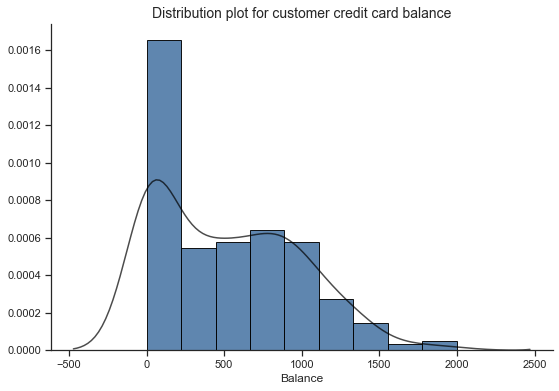

In [8]:
from statlearning import plot_dist

# The statlearning.py has additional functionality for this course  
# You have download and place it in the same directory as you are running this notebook from

fig, ax = plot_dist(train['Balance'])
ax.set_title('Distribution plot for customer credit card balance', fontsize=14)
plt.show()

In [9]:
(train['Balance']==0).sum()/len(train)

0.225

We should also plot the distribution of the predictors.

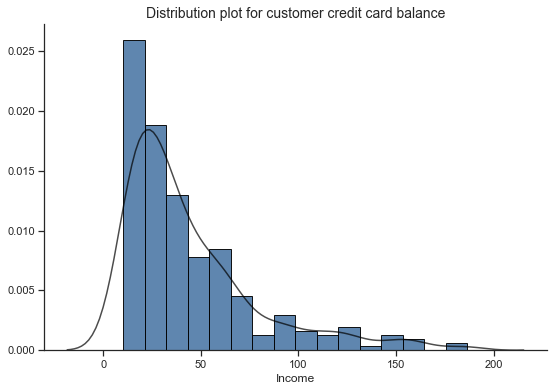

In [10]:
fig, ax = plot_dist(train['Income'])
ax.set_title('Distribution plot for customer credit card balance', fontsize=14)
plt.show()

A scatter plot of credit limit with credit balance suggests the presence of a nonlinear relationship between these two variables. Furthermore, there are several customers with a response value of zero, which is likely to affect model fit. 

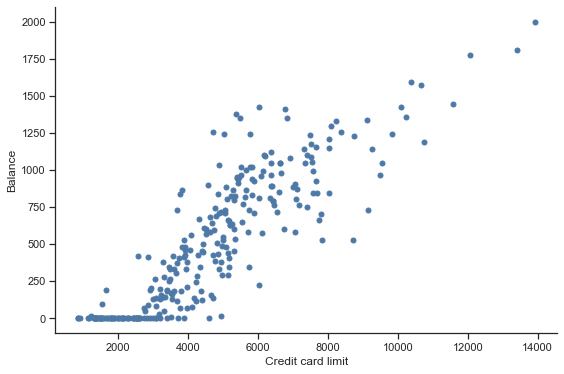

In [11]:
fig, ax = plt.subplots()
plt.scatter(train['Limit'], train['Balance'], s=25) # the s option specifies the size of the dot
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
sns.despine()
plt.show()

*Note about the figures: in general, the tutorial notebooks will provide code for figures that include customisation, which is done for aesthetic reasons. It should be clear which parts of then code are for customisation. If you are just getting started, you may want to keep things simpler.*

The next cell illustrates how we can create a figure to explore the relationship between a discrete or categorical variable and the response. 

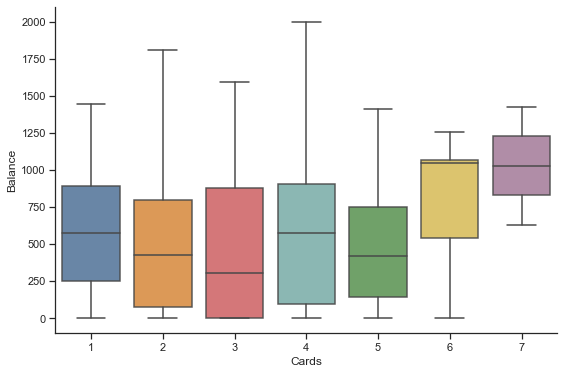

In [12]:
rows = train['Cards']<=7 # too few observations for more than 7 cards
sns.boxplot(x = train.loc[rows,'Cards'], y = train.loc[rows,'Balance'], boxprops=dict(alpha=.9))
sns.despine()
plt.show()

### 4. Feature Engineering

This part anticipates material from next week.

As mentioned above, feature engineering is the process of preparing the dataset for the learning algorithm. Nothing fancy here: we just need to code the nominal variables as numerical variables and delete either limit or rating to avoid multicollinearity (see EDA). See Chapter 3 of ISL and upcoming lectures for the explanation of why we do these things. For now, we just need to get some final dataset to work with. 

It is good practice to write a function that performs the full feature engineering process. There are a few reasons for this: 

<ol>
<li style="margin-top: 12px;">You need to process the test data in the same way, so that it avoids repetition. </li>
    
<li style="margin-top: 12px;">It allows you to easily reproduce the analysis. </li>

<li style="margin-top: 12px;">It helps you to build a library of data processing steps, which can save you a lot of time in the future.  </li>

<li style="margin-top: 12px;">You can use the function to continuously process new data in a live system. </li>

<li style="margin-top: 12px;">It makes it simpler for you to try different feature engineering pipelines. </li>
</ol>

We do as follows for this dataset:  

In [13]:
def feature_engineering(df):
    df['Male']=(df['Gender'] ==' Male').astype(int) # create dummy variable for gender
    df['Student']=(df['Student'] =='Yes').astype(int)
    df['Married']=(df['Married'] =='Yes').astype(int)
    df['Caucasian']=(df['Ethnicity'] =='Caucasian').astype(int)
    df['Asian']=(df['Ethnicity'] =='Asian').astype(int)
    df=df.loc[:, df.dtypes!='object'] # discards the columns that are not numerical
    df=df.drop(columns='Rating') # because of collinearity with limit
    return df

train = feature_engineering(train)
test  = feature_engineering(test)

train.head()

,Income,Limit,Cards,Age,Education,Student,Married,Balance,Male,Caucasian,Asian
Obs,,,,,,,,,,,
400,18.701,5524,5,64,7,0,0,966,0,0,1
26,14.090,4323,5,25,16,0,1,671,0,0,0
280,54.319,3063,3,59,8,1,0,269,0,1,0
261,67.937,5184,4,63,12,0,1,345,1,0,1
131,23.793,3821,4,56,12,1,1,868,0,0,0


Finally, we need to create the reponse vector and the design matrix that we will pass as arguments to the learning algorithm. What I like to do here is to create Python variables that identify the response and the predictors, referring to the column names in the pandas `DataFrame`. 

In [14]:
# Response label
response = 'Balance'

# Creates a list with the names of all variables that are not the response
predictors = [variable for variable in train.columns if variable!=response] 
print(predictors)

['Income', 'Limit', 'Cards', 'Age', 'Education', 'Student', 'Married', 'Male', 'Caucasian', 'Asian']


We then store the final data as NumPy arrays.

In [15]:
# Here we convert the data to NumPy arrays. This is not strictly necessary, but better.
# Try np.array(train[predictors]) if to_numpy() does not work

y_train = train[response].to_numpy()  # response vector
X_train = train[predictors].to_numpy() # design matrix

y_test = test[response].to_numpy()
X_test = test[predictors].to_numpy() 

*Technical note: our pipeline copied the data a few times along the away. If we were working with a very large dataset, we would need to worry about memory efficiency. We will not add this layer of complication to the tutorials.*

### 5. Linear Regression

Scikit-learn allows us to learn and use a wide range of machine learning algorithms using a simple recipe: 

1. Import the learning algorithm.
2. Specify the model and options.
3. Fit the model.
4. Use the learned model to make predictions. 

Here, we use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">LinearRegression</a> class from Scikit-Learn.

In [16]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

To compute the predictions for the test data, we do as follows:

In [17]:
y_pred = ols.predict(X_test)

Simple as that!

### 6. Model Analysis

At this point we want to assess whether the model is adequate and ask if we can improve it, before using a final model for evaluation. We may also be interested in interpretation. See Chapter 3 of ISL and forthcoming lectures.

### 7. Model Evaluation

The final step in our analysis is model evaluation. We create a table to display the results using pandas.  Our predictions have a RMSE of 97.19 dollars for the test data.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

# Initialise table
columns=['RMSE', 'R-Squared', 'MAE']
rows=['Linear Regression']
results = pd.DataFrame(0.0, columns=columns, index=rows)

# Compute test predictions and metrics
y_pred =  ols.predict(X_test) 
results.iloc[0, 0] = np.sqrt(mean_squared_error(y_test, y_pred))
results.iloc[0, 1] = r2_score(y_test, y_pred)
results.iloc[0, 2] = mean_absolute_error(y_test, y_pred) 

results.round(2)

,RMSE,R-Squared,MAE
Linear Regression,97.19,0.96,80.03


### 8. Saving the Data

We'll continue working with this dataset in the next session. Instead of starting over from the beginning, a good option here is to store the training and test dataframes in a [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) file. The Hierarchical Data Format (HDF) is very useful for data science because it provides a solution for storing and managing large and heterogeneous datasets, unlike text formats such as csv.  

In [20]:
train.to_hdf('Data/Credit.h5', 'train')
test.to_hdf('Data/Credit.h5', 'test')

This code saves both the training and test dataframes to a file called `Credit.h5` in the subfolder `Data`.

It is also possible to save the model. Refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/model_persistence.html) if you wish to learn how to do that.

### Formatting

The two cells below format the notebook for display online. Please omit them from your work.

In [21]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Source+Sans+Pro|Open+Sans:800&display=swap');
</style>

In [22]:
from IPython.core.display import HTML
style = open('css\jupyter.css', "r").read()
HTML('<style>'+ style +'</style>')